## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2021.

## Assignment 2 - Task 1: Optimization

In this task, we introduce several improved stochastic gradient descent (SGD) based optimization methods. Plain/naive SGD is a reasonable method to update neural network parameters. However, to make SGD perform well, one would need to find an appropriate learning rate and a good initial value. Otherwise, the network will get stuck if the learning rate is small, or it will diverge if the learning rate is too large. In reality, since we have no prior knowledge about the training data, it is not trivial to find a good learning rate manually. Also, when the network becomes deeper, for each layer one may need to set a different learning rate. Another common problem is the lack of sufficient training data. This can cause the training to get stuck when using the naive SGD method. These are the limitations of the plain SGD, which are motivators for creating and using improved SGD-based methods. 

To understand the process of setting a good learning rate, one can rely on adaptive learning rate methods. Here, you are going to experiment with **SGD with momentum**, **SGD with nesterov momentum**, **AdaGrad**, **Adam** and compare them against one another.
All of these optimizers are adaptive learning rate methods. Here is a useful link to learn more about each method used in this task: http://ruder.io/optimizing-gradient-descent/.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import modules
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

## Load Fashion-MNIST

Here we use a small dataset with only 2500 samples to simulate the "lack-of-data" situation.

In [2]:
# Load the raw Fashion-MNIST data.
train, val = fashion_mnist.load_data()

X_train_raw, y_train = train
X_val_raw, y_val = val

X_train = X_train_raw.reshape((X_train_raw.shape[0], X_train_raw.shape[1]**2))
X_val = X_val_raw.reshape((X_val_raw.shape[0], X_val_raw.shape[1]**2))

#Consider a subset of 2500 samples of the 60000 total images (indexed 10000 ~ 12500)
X_val = X_train[10000:10500,:]
y_val = y_train[10000:10500]
X_train = X_train[10500:12500,:]
y_train = y_train[10500:12500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We have vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Training data shape:  (2000, 784)
Training labels shape:  (2000,)
Validation data shape:  (500, 784)
Validation labels shape:  (500,)


## Part 1: Implement Several Optimizers

Instructors provide code snippets for testing student code implementations.

The best anticipated achievable accuracies are around 0.3-0.4.

In [3]:
from utils.neuralnets.mlp import MLP

### Original SGD with learning rate decay (for comparison purposes only)

In [4]:
from utils.optimizers import SGDOptim

model = MLP(input_dim=X_train.shape[1], hidden_dims=[100, 100], num_classes=10, weight_scale=1e-3, l2_reg=0.0)
optimizer = SGDOptim()
hist_sgd = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=30, batch_size=200, learning_rate=1e-2, learning_decay=0.95, 
                           verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.114, new learning rate = 0.0095
epoch 2: valid acc = 0.192, new learning rate = 0.009025
epoch 3: valid acc = 0.194, new learning rate = 0.00857375
epoch 4: valid acc = 0.198, new learning rate = 0.0081450625
epoch 5: valid acc = 0.206, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.2, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.202, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.206, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.198, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.202, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.206, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.214, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.212, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.214, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.202, new learni

### SGD + Momentum

<span style="color:red">__TODO:__</span> Implement SGD + Momentum by editing **SGDmomentumOptim** in __./utils/optimizers.py__

In [5]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import SGDmomentumOptim

model = MLP(input_dim=X_train.shape[1], hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3, momentum=0.8)
optimizer = SGDmomentumOptim(model, momentum=0.8)
hist_sgd_momentum = optimizer.train(model, X_train, y_train, X_val, y_val, 
                                         num_epoch=30, batch_size=200, learning_rate=1e-2, 
                                         learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.152, new learning rate = 0.0095
epoch 2: valid acc = 0.198, new learning rate = 0.009025
epoch 3: valid acc = 0.206, new learning rate = 0.00857375
epoch 4: valid acc = 0.218, new learning rate = 0.0081450625
epoch 5: valid acc = 0.222, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.216, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.212, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.35, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.418, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.42, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.416, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.436, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.45, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.53, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.548, new learning

### AdaGrad

<span style="color:red">__TODO:__</span> Implement Adam by editing **AdaGradOptim** in ./utils/optimizers.py

In [6]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import AdaGradOptim

model = MLP(input_dim=X_train.shape[1], hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdaGradOptim(model)
hist_adagrad = optimizer.train(model, X_train, y_train, X_val, y_val, 
                               num_epoch=30, batch_size=200, learning_rate=1e-3, 
                               learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.212, new learning rate = 0.00095
epoch 2: valid acc = 0.216, new learning rate = 0.0009025
epoch 3: valid acc = 0.264, new learning rate = 0.000857375
epoch 4: valid acc = 0.346, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.368, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.378, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.382, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.394, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.398, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.394, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.404, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.472, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.486, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.49, new learning rate = 0.00048767497911552944
epoch 15: valid a

### Adam

<span style="color:red">__TODO:__</span> Implement Adam by editing **AdamOptim** in ./utils/optimizers.py

In [7]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import AdamOptim

model = MLP(input_dim=X_train.shape[1], hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdamOptim(model)
hist_adam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=30, batch_size=200, learning_rate=1e-3, 
                            learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.218, new learning rate = 0.00095
epoch 2: valid acc = 0.202, new learning rate = 0.0009025
epoch 3: valid acc = 0.362, new learning rate = 0.000857375
epoch 4: valid acc = 0.384, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.406, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.592, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.594, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.656, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.654, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.726, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.766, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.796, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.812, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.83, new learning rate = 0.00048767497911552944
epoch 15: valid a

### Nadam

<span style="color:red">__TODO:__</span> Implement Nadam by editing **NadamOptim** in __./utils/optimizers.py__.

In [8]:
# Verification code for your implemention
# Please don't change anything.

from utils.optimizers import NadamOptim

model = MLP(input_dim=X_train.shape[1], hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = NadamOptim(model, beta1=0.9, beta2=0.999, eps=1e-8)
hist_sgd_nadam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                                         num_epoch=30, batch_size=200, learning_rate=1e-3, 
                                         learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.2, new learning rate = 0.00095
epoch 2: valid acc = 0.278, new learning rate = 0.0009025
epoch 3: valid acc = 0.432, new learning rate = 0.000857375
epoch 4: valid acc = 0.422, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.508, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.634, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.728, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.766, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.788, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.82, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.832, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.838, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.85, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.848, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

## Part 2: Comparison

<span style="color:red">__TODO:__</span> Run the following cells, which plot the loss, training accuracy, and validation accuracy curves of different optimizers.

In [9]:
loss_hist_sgd, train_acc_hist_sgd, val_acc_hist_sgd = hist_sgd
loss_hist_momentum, train_acc_hist_momentum, val_acc_hist_momentum = hist_sgd_momentum
loss_hist_nesterov, train_acc_hist_nesterov, val_acc_hist_nesterov = hist_sgd_nadam
loss_hist_adagrad, train_acc_hist_adagrad, val_acc_hist_adagrad = hist_adagrad
loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = hist_adam

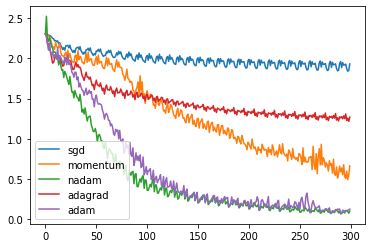

In [10]:
# Plot the training error curves for implemented optimizers
plt.plot(loss_hist_sgd, label="sgd")
plt.plot(loss_hist_momentum, label="momentum")
plt.plot(loss_hist_nesterov, label="nadam")
plt.plot(loss_hist_adagrad, label="adagrad")
plt.plot(loss_hist_adam, label="adam")
plt.legend()
plt.show()

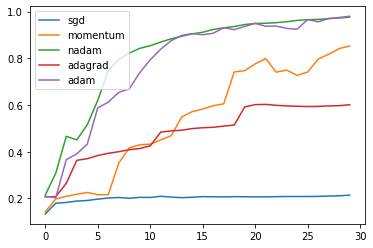

In [11]:
# Plot the training accuracy curves for implemented optimizers
plt.plot(train_acc_hist_sgd, label="sgd")
plt.plot(train_acc_hist_momentum, label="momentum")
plt.plot(train_acc_hist_nesterov, label="nadam")
plt.plot(train_acc_hist_adagrad, label="adagrad")
plt.plot(train_acc_hist_adam, label="adam")
plt.legend()
plt.show()

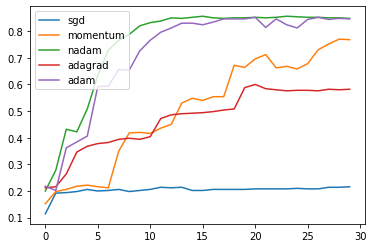

In [12]:
# Plot the validation accuracy curves for implemented optimizers
plt.plot(val_acc_hist_sgd, label="sgd")
plt.plot(val_acc_hist_momentum, label="momentum")
plt.plot(val_acc_hist_nesterov, label="nadam")
plt.plot(val_acc_hist_adagrad, label="adagrad")
plt.plot(val_acc_hist_adam, label="adam")
plt.legend()
plt.show()

<span style="color:red">__TODO:__</span> Describe your results, and discuss your understandings of these optimizers, such as their advantages/disadvantages and when to use them.

Answer: 

**SGD use the random batch to update one at a time. It is therefore usually much faster and can also be used to learn online. SGD performs frequent updates with a high variance that cause the objective function to fluctuate heavily.**

**Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction gamma of the update vector of the pask time step to the current update vector.**

**Adagrad adapts the learning rate to the parameters, performing smaller updates for parameters associated with infrequent features. It is well-suited for dealing with sparse data.**

**Adam compoute adaptive learning rates for each parameter. Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface.**

**Nadam combines Adam and NAG (Nesterov-accelerated Adaptive Moment Estimation).**